In [1]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dataset.csv')
df.dropna(inplace=True)
df.info()
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'dataset.csv'

In [37]:
df.loc[:,['Soil_Type7', 'Soil_Type15']].value_counts()

Soil_Type7  Soil_Type15
0           0              15120
dtype: int64

In [30]:
df.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [39]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

X = (X-X.mean())/X.std()
X.fillna(0, inplace=True)
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-0.367083,-0.959948,-1.597079,0.146635,-0.834047,-0.908651,0.271445,0.571635,0.281250,4.334662,...,-0.14983,-0.218664,-0.206078,-0.038171,-0.08241,-0.025725,-0.047472,-0.224901,-0.213127,-0.176934
1,-0.381448,-0.914529,-1.715367,-0.072335,-0.932023,-0.999213,0.238724,0.703202,0.346616,4.285568,...,-0.14983,-0.218664,-0.206078,-0.038171,-0.08241,-0.025725,-0.047472,-0.224901,-0.213127,-0.176934
2,0.130908,-0.160572,-0.887349,0.194237,0.227361,1.106342,0.696820,0.834770,-0.002005,4.191017,...,-0.14983,-0.218664,-0.206078,-0.038171,-0.08241,-0.025725,-0.047472,-0.224901,-0.213127,-0.176934
3,0.085419,-0.015230,0.177245,0.070471,1.092817,1.038421,0.827704,0.834770,-0.285259,4.272840,...,-0.14983,-0.218664,-0.206078,-0.038171,-0.08241,-0.025725,-0.047472,-0.224901,-0.213127,-0.176934
4,-0.369477,-1.014451,-1.715367,-0.353186,-0.850376,-0.998458,0.238724,0.659346,0.324827,4.237383,...,-0.14983,-0.218664,-0.206078,-0.038171,-0.08241,-0.025725,-0.047472,-0.224901,-0.213127,-0.176934


In [40]:
X.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [41]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [42]:
print(len(X_train))
print(len(X_test))

12096
3024


In [43]:
print(len(X_train.columns))

54


## Task 1

#### Defining Adaboost test and train functions from scratch

In [46]:
def weight_updation(w_i, alpha, y, y_pred):   
    new_w_i = w_i * np.exp(-alpha * np.dot(y.to_numpy(), y_pred))   
    return new_w_i

In [47]:
def training_adaboost(XTrain, yTrain, num_rounds):
    
    wc_list = []
    training_errors = []
    training_accuracy_list = []
    alpha_list = []
    alpha = 0
    
    for i in range(0,num_rounds):
        #1. weights initialization
        if i==0:
            w_i = np.ones(len(yTrain)) * 1 / len(yTrain)
        else:
            #4.weight updation
            w_i = weight_updation(w_i, alpha, yTrain, wc_y_predict) 
            w_i = w_i/w_i.sum()
        
            
        #base learner/weak classifier training and prediction
        wc = DecisionTreeClassifier(max_depth = 10)     
        wc.fit(XTrain, yTrain, sample_weight = w_i)
        wc_y_predict = wc.predict(XTrain)    
        wc_list.append(wc) # weak_classifiers list      
        
        #2. error computation
        err = sum(w_i * (np.not_equal(yTrain, wc_y_predict)).astype(int))
        training_errors.append(err)
        
        #3. alpha computation - alpha list size = number of models
        alpha = 0.5 * np.log((1 - err) / err)
        alpha_list.append(alpha)
        
        
    return wc_list, alpha_list    

In [ ]:
def testing_adaboost(adaboost_params, wc_list, XTest, yTest=None):
    test_accuracy = 0
    
    y_pred_tmp = []
    y_pred = []
    
    for i in range(len(wc_list)):
        val = wc_list[i].predict(XTest) * adaboost_params[i]
        y_pred_tmp.append(wc_list[i].predict(XTest) * adaboost_params[i])
    
    # Estimate final predictions
    for i in range(0,len(y_pred_tmp[0])):
        y_pred_ind = 0
        for j in range(0,len(y_pred_tmp)):
            y_pred_ind = y_pred_ind + y_pred_tmp[j][i]    
        y_pred.append(np.sign(y_pred_ind.astype(int)))  
        
    test_accuracy = accuracy_score(yTest.to_numpy(), y_pred)
        
    return test_accuracy

#### Defining Adaboost test and train functions using inbuilt functions

In [75]:
def training_adaboost(XTrain, yTrain, num_rounds):  
    
    adaboost_train = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8),n_estimators = num_rounds)
    adaboost_train.fit(XTrain, yTrain)
    
    return adaboost_train

In [76]:
def testing_adaboost(adaboost_params, XTest, yTest):
    y_pred = adaboost_params.predict(XTest)   
    return accuracy_score(yTest, y_pred)

In [86]:
train_accuracy_al = [] #train accuracies of 100 adaboost learners
test_accuracy_al = [] #test accuracies of 100 adaboost learners

for num_of_rounds in range(0,100):
    print('Iteration number : ',num_of_rounds)
    adaboost = training_adaboost(X_train, y_train, num_of_rounds+1)
    train_acc = testing_adaboost(adaboost, X_train, y_train)
    train_accuracy_al.append(train_acc)
    test_acc = testing_adaboost(adaboost, X_test, y_test)
    test_accuracy_al.append(test_acc)
    print("Train accuracy : ",train_acc)
    print("Test accuracy : ",test_acc)
    print(' ')

Iteration number :  0
Train accuracy :  0.7658730158730159
Test accuracy :  0.7268518518518519
 
Iteration number :  1
Train accuracy :  0.6455853174603174
Test accuracy :  0.5902777777777778
 
Iteration number :  2
Train accuracy :  0.7257771164021164
Test accuracy :  0.6590608465608465
 
Iteration number :  3
Train accuracy :  0.6226851851851852
Test accuracy :  0.5638227513227513
 
Iteration number :  4
Train accuracy :  0.7181712962962963
Test accuracy :  0.6488095238095238
 
Iteration number :  5
Train accuracy :  0.738260582010582
Test accuracy :  0.6650132275132276
 
Iteration number :  6
Train accuracy :  0.6889880952380952
Test accuracy :  0.6015211640211641
 
Iteration number :  7
Train accuracy :  0.7396660052910053
Test accuracy :  0.6398809523809523
 
Iteration number :  8
Train accuracy :  0.7494212962962963
Test accuracy :  0.6491402116402116
 
Iteration number :  9
Train accuracy :  0.7682705026455027
Test accuracy :  0.66005291005291
 
Iteration number :  10
Train accu

Train accuracy :  0.9583333333333334
Test accuracy :  0.8042328042328042
 
Iteration number :  85
Train accuracy :  0.9584160052910053
Test accuracy :  0.8015873015873016
 
Iteration number :  86
Train accuracy :  0.9553571428571429
Test accuracy :  0.8045634920634921
 
Iteration number :  87
Train accuracy :  0.9524636243386243
Test accuracy :  0.8058862433862434
 
Iteration number :  88
Train accuracy :  0.9566798941798942
Test accuracy :  0.8035714285714286
 
Iteration number :  89
Train accuracy :  0.9466765873015873
Test accuracy :  0.8048941798941799
 
Iteration number :  90
Train accuracy :  0.9524636243386243
Test accuracy :  0.794973544973545
 
Iteration number :  91
Train accuracy :  0.9591600529100529
Test accuracy :  0.8042328042328042
 
Iteration number :  92
Train accuracy :  0.9475859788359788
Test accuracy :  0.8015873015873016
 
Iteration number :  93
Train accuracy :  0.9571759259259259
Test accuracy :  0.8009259259259259
 
Iteration number :  94
Train accuracy :  0.9

In [88]:
print(len(train_accuracy_al))
print(len(test_accuracy_al))

100
100


### Task 2 - Base Learner Training and Testing

In [74]:
base_learner = DecisionTreeClassifier(max_depth = 8)     
base_learner.fit(X_train, y_train)
y_predict_bl = base_learner.predict(X_test)    #base_learner y_pred
 
#Train accuracy
trainacc_bl = accuracy_score(y_train, base_learner.predict(X_train))
print('Base Learner Train Accuracy : ',trainacc_bl)
#Test accuracy
testacc_bl = accuracy_score(y_test, y_predict_bl)
print('Base Learner Test Accuracy : ',testacc_bl)

Base Learner Train Accuracy :  0.7658730158730159
Base Learner Test Accuracy :  0.7271825396825397


### Task 3 - Graph

In [90]:
x = [i for i in range(0,100)]
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


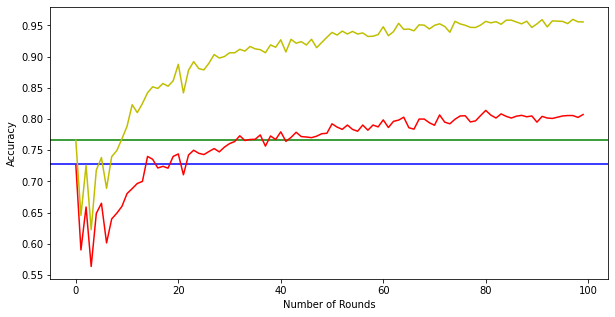

In [94]:
# plot accuracy
plt.figure(figsize=(10,5))
plt.axhline(y=trainacc_bl, label="Base Learner Train accuracy", color = 'g')
plt.axhline(y=testacc_bl, label="Base Learner Test accuracy", color = 'b')
plt.plot(x, train_accuracy_al, label="Adaboost Train Accuracy", color = 'y') 
plt.plot(x, test_accuracy_al, label="Adaboost Test Accuracy", color = 'r')
plt.xlabel("Number of Rounds")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#plt.legend(loc="lower right")

### Task 4 

In [ ]:
accuracy proportional to number of rounds. The more we run adaboost the more accuracy reason?
initially accuracy dropped slowly till???

### Task 5

In [104]:
judge_dataset = pd.read_csv('judge-no-labels.csv')
judge_dataset.dropna(inplace=True)
judge_dataset.info()
judge_dataset.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565892 entries, 0 to 565891
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Id                                  565892 non-null  int64
 1   Elevation                           565892 non-null  int64
 2   Aspect                              565892 non-null  int64
 3   Slope                               565892 non-null  int64
 4   Horizontal_Distance_To_Hydrology    565892 non-null  int64
 5   Vertical_Distance_To_Hydrology      565892 non-null  int64
 6   Horizontal_Distance_To_Roadways     565892 non-null  int64
 7   Hillshade_9am                       565892 non-null  int64
 8   Hillshade_Noon                      565892 non-null  int64
 9   Hillshade_3pm                       565892 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  565892 non-null  int64
 11  Wilderness_Area1                    565892 non-null 

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [105]:
judge_X = judge_dataset.copy()
judge_X.drop(columns=['Id'], axis=1, inplace=True)
judge_X = (judge_X-judge_X.mean())/judge_X.std()
judge_X.fillna(0, inplace=True)
judge_X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-1.043273,1.771764,-0.005320,-1.273207,-0.795307,0.202921,-0.605045,-0.479713,0.349014,3.504735,...,-0.216486,-0.317525,-0.29228,-0.053065,-0.056315,-0.01388,-0.021604,-0.164133,-0.154236,-0.121939
1,-1.032291,-1.390020,-0.139545,-1.273207,-0.795307,0.183708,-0.417505,-0.378026,0.243834,3.527335,...,-0.216486,-0.317525,-0.29228,-0.053065,-0.056315,-0.01388,-0.021604,-0.164133,-0.154236,-0.121939
2,-0.922464,-1.247114,0.128905,-1.273207,-0.795307,0.392484,-0.229966,-0.784777,-0.150590,3.277975,...,-0.216486,-0.317525,-0.29228,-0.053065,-0.056315,-0.01388,-0.021604,-0.164133,-0.154236,-0.121939
3,-0.937107,-1.175662,0.397356,-1.273207,-0.795307,0.373272,-0.154950,-1.140684,-0.466130,3.300576,...,-0.216486,-0.317525,-0.29228,-0.053065,-0.056315,-0.01388,-0.021604,-0.164133,-0.154236,-0.121939
4,-0.948090,-1.131004,0.665807,-1.273207,-0.795307,0.354059,-0.079934,-1.445747,-0.729079,3.323176,...,-0.216486,-0.317525,-0.29228,-0.053065,-0.056315,-0.01388,-0.021604,-0.164133,-0.154236,-0.121939


In [60]:
#judge_X.isna().sum()

In [97]:
def testing_adaboost1(adaboost_model, XTest): 
    y_pred = adaboost_model.predict(XTest)
    return y_pred

In [98]:
y_pred_judge = testing_adaboost1(adaboost_train, judge_X)

In [99]:
print(len(y_pred_judge))
print(type(y_pred_judge))

565892
<class 'numpy.ndarray'>


In [109]:
y_pred_df = pd.DataFrame()
y_pred_df['Id'] = judge_dataset.loc[:,'Id'].values
y_pred_df['Cover_Type'] = y_pred_judge
y_pred_df.info()
y_pred_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565892 entries, 0 to 565891
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Id          565892 non-null  int64
 1   Cover_Type  565892 non-null  int64
dtypes: int64(2)
memory usage: 8.6 MB


,Id,Cover_Type
0,15121,6
1,15122,6
2,15123,6
3,15124,6
4,15125,6


In [106]:
judge_dataset['Cover_Type'] = y_pred_judge
judge_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565892 entries, 0 to 565891
Data columns (total 56 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Id                                  565892 non-null  int64
 1   Elevation                           565892 non-null  int64
 2   Aspect                              565892 non-null  int64
 3   Slope                               565892 non-null  int64
 4   Horizontal_Distance_To_Hydrology    565892 non-null  int64
 5   Vertical_Distance_To_Hydrology      565892 non-null  int64
 6   Horizontal_Distance_To_Roadways     565892 non-null  int64
 7   Hillshade_9am                       565892 non-null  int64
 8   Hillshade_Noon                      565892 non-null  int64
 9   Hillshade_3pm                       565892 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  565892 non-null  int64
 11  Wilderness_Area1                    565892 non-null 

In [111]:
y_pred_df.to_csv('judge-predictions.csv',index=False)